In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/ZafarAqil/Solar-Radiation-Prediction/Major/SolarDelhi.csv',parse_dates = ['Date'], index_col = ['Date'])

In [3]:
data.head()

,Precipitation,Specific_Humidity,Surface Pressure,Surface_Temperature,Clearness_Index,Radiative_Flux,Radiation
Date,,,,,,,
1986-01-01,0.0,0.003804,99.05,11.48,0.68,6.50,3.97
1986-02-01,0.0,0.003457,99.06,12.04,0.76,6.36,4.42
1986-03-01,0.0,0.002902,99.23,9.92,0.73,6.50,4.29
1986-04-01,0.0,0.002433,99.17,9.33,0.72,6.18,4.19
1986-05-01,0.0,0.002600,99.00,9.36,0.75,6.57,4.39


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


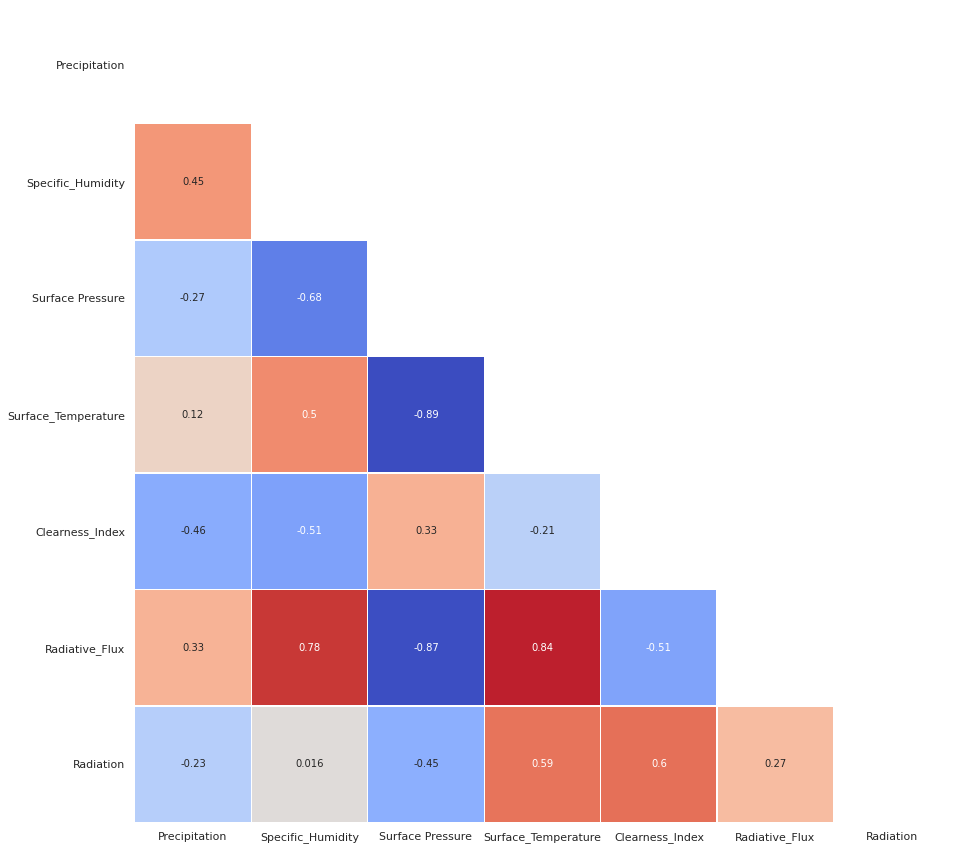

In [4]:
import numpy as np # linear algebra
from scipy import stats # statistics
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting tools
import seaborn as sns # advanced plotting tools
sns.set(style="white")
%matplotlib inline
def corrPairs(df):
    #Pairwise correlation matrix
    corr = df.corr() # Compute the correlation matrix
    mask = np.zeros_like(corr, dtype=np.bool) # make mask
    mask[np.triu_indices_from(mask)] = True # mask upper triangle
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.3, annot=True, cbar=False)

#data['WeekOfYear'] = data.index.Date # add week to view correlation

plt.figure(figsize=(15,15))
corrPairs(data)

In [5]:
data.corr()

,Precipitation,Specific_Humidity,Surface Pressure,Surface_Temperature,Clearness_Index,Radiative_Flux,Radiation
Precipitation,1.000000,0.452469,-0.265497,0.115499,-0.458199,0.325617,-0.231088
Specific_Humidity,0.452469,1.000000,-0.676242,0.501783,-0.514246,0.784656,0.015835
Surface Pressure,-0.265497,-0.676242,1.000000,-0.891904,0.334998,-0.872245,-0.446472
Surface_Temperature,0.115499,0.501783,-0.891904,1.000000,-0.208347,0.844994,0.589007
Clearness_Index,-0.458199,-0.514246,0.334998,-0.208347,1.000000,-0.505756,0.603927
Radiative_Flux,0.325617,0.784656,-0.872245,0.844994,-0.505756,1.000000,0.272500
Radiation,-0.231088,0.015835,-0.446472,0.589007,0.603927,0.272500,1.000000


In [0]:
input_feature= data.iloc[:, :].values
input_data = input_feature

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,:] = sc.fit_transform(input_feature[:,:])

In [8]:
input_data[0]

array([0.        , 0.1348561 , 0.76595745, 0.13535197, 0.84615385,
       0.12868217, 0.46593674])

In [0]:
lookback= 50

test_size=int(.3 * len(data))
X=[]
y=[]
for i in range(len(data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,6])

In [10]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 7)
X_test = X_test.reshape(X_test.shape[0],lookback, 7)
print(X.shape)
print(X_test.shape)

(12235, 50, 7)
(3735, 50, 7)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
model = tf.keras.Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],7)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 30)            4560      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 19,231
Trainable params: 19,231
Non-trainable params: 0
_________________________________________________________________


In [0]:
def r2_score(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mape', r2_score])

In [13]:
history = model.fit(X, y, epochs=50, batch_size=200)

Epoch 1/50


Using TensorFlow backend.


62/62 [==============================] - 7s 106ms/step - loss: 0.0546 - mae: 0.1693 - mape: 42516.9609 - r2_score: -0.8031
Epoch 2/50
62/62 [==============================] - 7s 106ms/step - loss: 0.0183 - mae: 0.1024 - mape: 40669.4258 - r2_score: 0.3941
Epoch 3/50
62/62 [==============================] - 7s 106ms/step - loss: 0.0163 - mae: 0.0934 - mape: 36607.3086 - r2_score: 0.4563
Epoch 4/50
62/62 [==============================] - 7s 106ms/step - loss: 0.0161 - mae: 0.0912 - mape: 37361.0234 - r2_score: 0.4640
Epoch 5/50
62/62 [==============================] - 7s 106ms/step - loss: 0.0157 - mae: 0.0901 - mape: 39477.0898 - r2_score: 0.4788
Epoch 6/50
62/62 [==============================] - 7s 106ms/step - loss: 0.0154 - mae: 0.0883 - mape: 40186.7812 - r2_score: 0.4848
Epoch 7/50
62/62 [==============================] - 7s 105ms/step - loss: 0.0152 - mae: 0.0875 - mape: 40405.2617 - r2_score: 0.4952
Epoch 8/50
62/62 [==============================] - 7s 106ms/step - loss: 0.014

In [0]:
predicted_value= model.predict(X_test)

dict_keys(['loss', 'mae', 'mape', 'r2_score'])


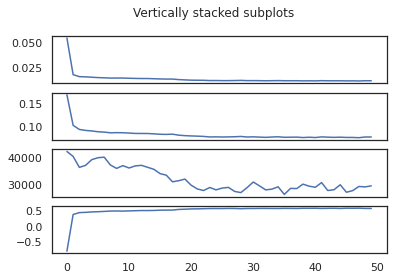

In [15]:
history_dict = history.history
print(history_dict.keys())
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(history.history['loss'])
axs[1].plot(history.history['mae'])
axs[2].plot(history.history['mape'])
axs[3].plot(history.history['r2_score'])
# plt.plot(history.history['mean_absolute_error'])
# plt.plot(history.history['mean_absolute_percentage_error'])
# plt.plot(history.history['r2_score'])

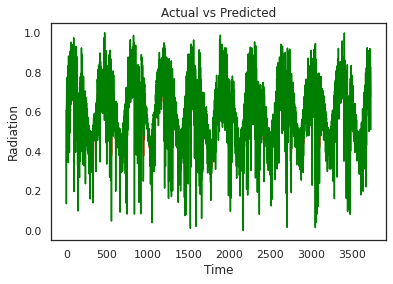

In [16]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),6], color='green')
plt.title("Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Radiation")
plt.show()